In [45]:
# imports needed

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import wrangle
import env

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Acquire the data

df = wrangle.get_zillow_data()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,nan,nan,nan,2.00,3.00,nan,8.00,2.00,...,"60,371,132,321,007.00",-0.01,2017-07-07,None,None,None,Central,Single Family Residential,None,None
1,1072280,10711877,1.00,nan,nan,2.00,4.00,nan,8.00,2.00,...,"60,371,132,321,007.00",0.02,2017-08-29,Central,None,None,Central,Single Family Residential,None,None
2,1340933,10711888,1.00,nan,nan,2.00,4.00,nan,8.00,2.00,...,"60,371,132,321,007.00",0.08,2017-04-04,Central,None,None,Central,Single Family Residential,None,None
3,1878109,10711910,nan,nan,nan,2.00,3.00,nan,8.00,2.00,...,"60,371,132,321,008.00",-0.04,2017-03-17,None,None,None,Central,Single Family Residential,None,None
4,2190858,10711923,nan,nan,nan,2.00,4.00,nan,8.00,2.00,...,"60,371,132,321,008.00",-0.01,2017-03-24,None,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77570,775695,167686999,nan,nan,nan,0.00,0.00,nan,nan,nan,...,nan,-0.07,2017-02-28,None,None,None,None,Single Family Residential,None,None
77571,2863262,167687739,nan,nan,nan,0.00,0.00,nan,nan,nan,...,nan,0.36,2017-03-03,None,None,None,None,Condominium,None,None
77572,1372384,167687839,nan,nan,nan,0.00,0.00,nan,nan,nan,...,nan,0.04,2017-05-31,None,None,None,None,Single Family Residential,None,None
77573,2758757,167688532,1.00,nan,nan,3.00,3.00,nan,4.00,3.00,...,nan,0.01,2017-02-03,Central,None,None,Central,Condominium,None,None


In [4]:
# Save the data in a .csv file saved locally so it won't take as long to load

df.to_csv("zillow.csv")

### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [5]:
# Confirming that my is data is what I think it is

df.shape

(77575, 68)

In [6]:
# Take a look at the columns, their nulls, and their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 68 columns):
id                              77575 non-null int64
parcelid                        77575 non-null int64
airconditioningtypeid           25006 non-null float64
architecturalstyletypeid        206 non-null float64
basementsqft                    50 non-null float64
bathroomcnt                     77575 non-null float64
bedroomcnt                      77575 non-null float64
buildingclasstypeid             15 non-null float64
buildingqualitytypeid           49809 non-null float64
calculatedbathnbr               76960 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6035 non-null float64
calculatedfinishedsquarefeet    77375 non-null float64
finishedsquarefeet12            73920 non-null float64
finishedsquarefeet13            42 non-null float64
finishedsquarefeet15            3027 non-null float64
finishedsquarefeet50          

In [7]:
# Look at the nulls in each column

df.isnull().sum().sort_values(ascending = False)[:45]

buildingclassdesc           77560
buildingclasstypeid         77560
finishedsquarefeet13        77533
basementsqft                77525
storydesc                   77525
storytypeid                 77525
yardbuildingsqft26          77505
fireplaceflag               77403
architecturalstyledesc      77369
architecturalstyletypeid    77369
typeconstructiontypeid      77353
typeconstructiondesc        77353
finishedsquarefeet6         77189
pooltypeid10                77110
decktypeid                  76961
poolsizesum                 76706
pooltypeid2                 76501
hashottuborspa              76036
yardbuildingsqft17          75182
taxdelinquencyflag          74675
taxdelinquencyyear          74675
finishedsquarefeet15        74548
finishedsquarefeet50        71540
finishedfloor1squarefeet    71540
fireplacecnt                69288
threequarterbathnbr         67470
pooltypeid7                 62497
poolcnt                     61402
numberofstories             59979
airconditionin

### Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute.

In [8]:
# Determine how much of my data are nulls

df.isnull().sum()/df.shape[0]

id                                         0.00
parcelid                                   0.00
airconditioningtypeid                      0.68
architecturalstyletypeid                   1.00
basementsqft                               1.00
                                   ...         
buildingclassdesc                          1.00
heatingorsystemdesc                        0.36
propertylandusedesc                        0.00
storydesc                                  1.00
typeconstructiondesc                       1.00
Length: 68, dtype: float64

In [9]:
# Function to assess missing data in the rows

def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [10]:
# \

nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False).head(40)

,number_missing_rows,percent_rows_missing
buildingclassdesc,77560,1.00
buildingclasstypeid,77560,1.00
finishedsquarefeet13,77533,1.00
storytypeid,77525,1.00
basementsqft,77525,1.00
storydesc,77525,1.00
yardbuildingsqft26,77505,1.00
fireplaceflag,77403,1.00
architecturalstyletypeid,77369,1.00
architecturalstyledesc,77369,1.00


### Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing

In [11]:
# Function to assess missing data in the columns

def cols_missing(df):
    df_missing = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    df_missing['pct_cols_missing'] = df_missing.num_cols_missing/df.shape[1]
    return df_missing

In [12]:
# Sort values by pc_col_missing

cols_missing(df).sort_values(by = ['pct_cols_missing'], ascending = False)

,num_cols_missing,num_rows,pct_cols_missing
25,48,3,0.71
24,47,3,0.69
23,46,5,0.68
22,45,50,0.66
21,44,79,0.65
20,43,29,0.63
19,42,26,0.62
18,41,29,0.60
17,40,230,0.59
16,39,285,0.57


### Remove any properties that are likely to be something other than single unit properties.

In [13]:
# Look at value counts for 'unitcnt'

df.unitcnt.value_counts(dropna = False)

  1.00    47413
   nan    26872
  2.00     2031
  4.00      726
  3.00      529
 45.00        1
  6.00        1
237.00        1
 42.00        1
Name: unitcnt, dtype: int64

In [14]:
# Restrict df to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
        
# Restrict df to only those properties with at least 1 bath & bed and >500 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>500)]

In [15]:
# check # of columns and rows left
df.shape

(71215, 68)

### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values

In [16]:
# Make the function

def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [17]:
# Use the function

df = handle_missing_values(df)

In [18]:
# Check shape to see what we have left

df.shape

(71215, 34)

In [19]:
# Look at remaining number of nulls for each column

df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26456
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              162
fips                                0
fullbathcnt                        15
heatingorsystemtypeid           24882
latitude                            0
longitude                           0
lotsizesquarefeet                7993
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              26163
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26137
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentye

In [20]:
# Get rid of unnecessary and redundant columns

df = df.drop(['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc', 'heatingorsystemdesc'], axis=1)

In [21]:
# Take a look at null counts again

df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26456
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                7993
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26137
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
dtype: int64

In [22]:
# Fill 'NaN' with unit count of 1

df.unitcnt.fillna(1, inplace = True)

In [23]:
# Find the median value of buildingqualitytypeid

df.buildingqualitytypeid.median()

6.0

In [24]:
# Fill missing values for buildingqualitytypeid with median value

df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [25]:
# Find the median lot size

df.lotsizesquarefeet.median()

7315.0

In [26]:
# Fill missing values with median null sizes

df.lotsizesquarefeet.fillna(7315, inplace = True)

In [27]:
# Drop the rest of nulls 

df.dropna(inplace = True)

In [28]:
# Remove properties valued more than 4.5 million dollars

df = df[df.taxvaluedollarcnt < 4_500_000]

In [29]:
# Remove properties valued more than 8000 square feet

df[df.calculatedfinishedsquarefeet < 8000]
df.shape

(69547, 23)

In [30]:
# Put it all together in a function

def wrangle_zillow():
    df = pd.read_csv('zillow.csv')
    
    # Restrict df to only properties that meet single-use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Filter those properties without at least 1 bath & bed and 500 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>500)]

    # Drop columns and rows based on a predetermined criteria
    df = handle_missing_values(df)
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))
    
    # Drop unnecessary/redundant columns
    df = df.drop(['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc', 'heatingorsystemdesc'],axis=1)
    
    # Replace nulls in unitcnt with 1
    df.unitcnt.fillna(1, inplace = True)
    
    # Replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7315, inplace = True)
    df.buildingqualitytypeid.fillna(6.0, inplace = True)
    
    # Drop any remaining nulls
    df = df.dropna()
    
    # Columns that need to be adjusted for outliers
    df = df[df.taxvaluedollarcnt < 4_500_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    return df

In [31]:
df = wrangle.wrangle_zillow()
df

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,0,10711855,2.00,3.00,8.00,"2,107.00","6,037.00","34,222,559.00","-118,617,387.00","9,158.00",...,1.00,"1,972.00","249,655.00","624,139.00","2,016.00","374,484.00","7,659.36",-0.01,2017-07-07,Los_Angeles
1,1,10711877,2.00,4.00,8.00,"1,882.00","6,037.00","34,220,261.00","-118,616,409.00","9,035.00",...,1.00,"1,972.00","253,000.00","660,000.00","2,016.00","407,000.00","8,123.91",0.02,2017-08-29,Los_Angeles
2,2,10711888,2.00,4.00,8.00,"1,882.00","6,037.00","34,222,491.00","-118,616,854.00","9,800.00",...,1.00,"1,972.00","257,591.00","542,923.00","2,016.00","285,332.00","6,673.24",0.08,2017-04-04,Los_Angeles
3,3,10711910,2.00,3.00,8.00,"1,477.00","6,037.00","34,221,864.00","-118,615,739.00","11,285.00",...,1.00,"1,960.00","57,968.00","78,031.00","2,016.00","20,063.00","1,116.46",-0.04,2017-03-17,Los_Angeles
4,4,10711923,2.00,4.00,8.00,"1,918.00","6,037.00","34,220,619.00","-118,615,253.00","11,239.00",...,1.00,"1,960.00","167,869.00","415,459.00","2,016.00","247,590.00","5,239.85",-0.01,2017-03-24,Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77545,77545,93577187,2.00,2.00,6.00,900.00,"6,111.00","34,212,400.00","-119,027,000.00","7,315.00",...,1.00,"2,006.00","108,211.00","309,621.00","2,016.00","201,410.00","3,280.22",0.02,2017-03-15,Ventura
77546,77546,162960516,2.50,3.00,6.00,"1,449.00","6,111.00","34,273,914.00","-119,164,501.00","6,926.00",...,1.00,"1,986.00","288,913.00","481,521.00","2,016.00","192,608.00","5,063.30",0.02,2017-05-08,Ventura
77547,77547,162960529,4.00,4.00,6.00,"2,459.00","6,111.00","34,245,590.00","-119,169,692.00","5,400.00",...,1.00,"2,007.00","169,000.00","479,000.00","2,016.00","310,000.00","12,285.88",0.01,2017-05-26,Ventura
77548,77548,162960596,2.00,4.00,6.00,"1,379.00","6,111.00","34,219,587.00","-119,042,663.00","7,343.00",...,1.00,"1,960.00","224,567.00","449,134.00","2,016.00","224,567.00","4,787.16",0.03,2017-07-18,Ventura


## Mall Portion

In [34]:
# acquire the data

mall_df = wrangle.get_mall_data()
mall_df

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [35]:
# Take a look closer at the columns

mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [36]:
# Take a look at the stats

mall_df.describe()

,age,annual_income,spending_score
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


In [37]:
# Determine if there are any nulls

mall_df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

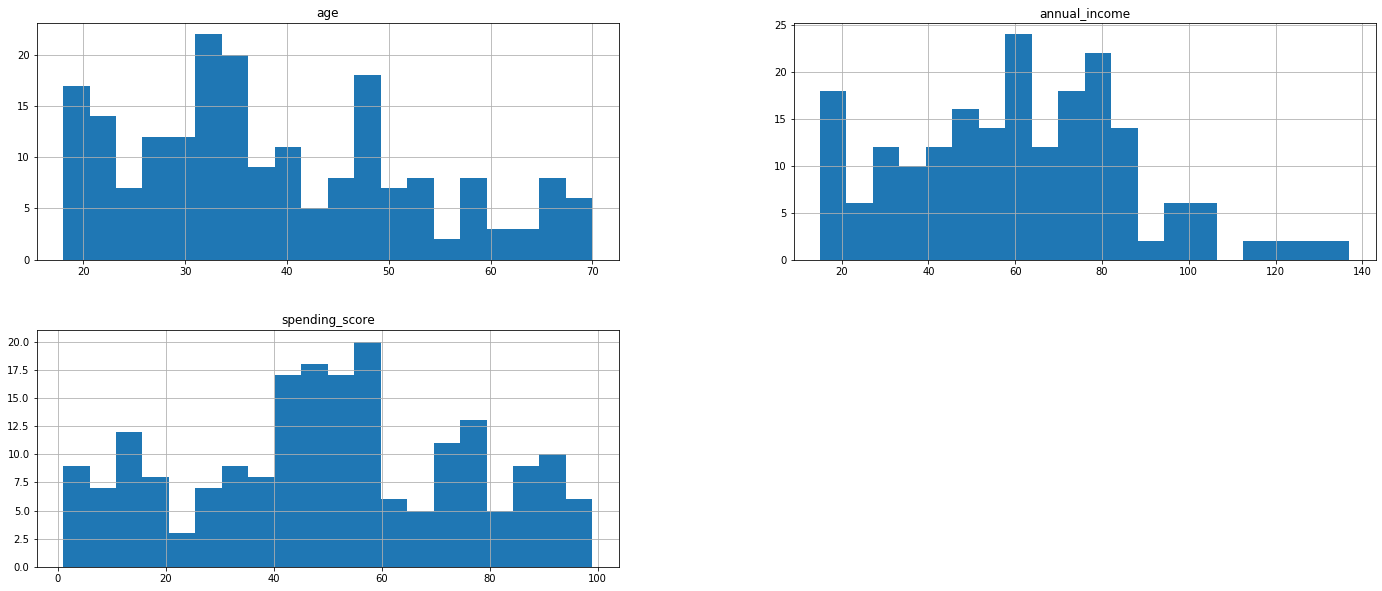

In [38]:
mall_df.hist(figsize=(24, 10), bins=20);

In [39]:
# Calculate q1, q3 and iqr for income

q1 = mall_df.annual_income.quantile(0.25)
q3 = mall_df.annual_income.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

upper_bound_income

132.75

In [40]:
# Function to detect and eliminate outliers using IQR rule

def outlier_function(df, cols, k):
    for col in df[cols]:
        q1 = mall_df.annual_income.quantile(0.25)
        q3 = mall_df.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [41]:
# Use the outlier function to handle outliers in numeric columns

mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)

In [42]:
# Encode the gender column

dummy_df = pd.get_dummies(mall_df.gender, drop_first=True)
dummy_df.head()

,Male
customer_id,
1,1
2,1
3,0
4,0
5,0


In [43]:
# Concat the dummies df with original df. Drop the 'gender' column

mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])
mall_df.head()

,age,annual_income,spending_score,Male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [46]:
# Split the data

train, test = train_test_split(mall_df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

In [47]:
# Check the shape

train.shape, validate.shape, test.shape

((118, 4), (40, 4), (40, 4))

In [48]:
# Scale the numeric columns

def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [49]:
train.select_dtypes('number').columns

Index(['age', 'annual_income', 'spending_score', 'Male'], dtype='object')

In [50]:
# Use the scaler

scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [55]:
# Write a wrangle fuction which acquires and prepares the data

def wrangle_mall_df():
    
    # acquire data
    mall_df = get_mall_data()
    
    # handle outliers
    mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)
    
    # get dummy for gender column
    dummy_df = pd.get_dummies(mall_df.gender, drop_first=True)
    mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])

    # split the data in train, validate and test
    train, test = train_test_split(mall_df, train_size = 0.8, random_state = 123)
    train, validate = train_test_split(train, train_size = 0.75, random_state = 123)
    
    return min_max_scaler(train, validate, test)